## 1 Coding practice: SVM for classification [10 pts]
In this assignment, we will be working on the dataset of model price classification. The task is to classify the level of cost given the features of mobiles. In machine learning terms, it is a classification problem. The data are provided in the data folder. The training and testing data are in the different files. You can use numpy or pandas libraries to load the csv files.

In [7]:
# Recommended package versions
# python==3.10
# numpy==1.23.5
# pandas==1.5.3
# matplotlib==3.7.1
# seaborn==0.12.2
# scikit-learn==1.0

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import sklearn.metrics as metrics
%matplotlib inline

In [8]:
# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Set variables for the targets and features
y_train = train_data['price_range']
X_train = train_data.drop('price_range', axis=1)
y_test = test_data['price_range']
X_test = test_data.drop('price_range', axis=1)

# Normalize Data
X_train_norm = (X_train-X_train.mean())/X_train.std()
X_test_norm = (X_test-X_train.mean())/X_train.std()

### 2.a

The linear kernel is written as $<x,x'>$.

The parameter C, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.

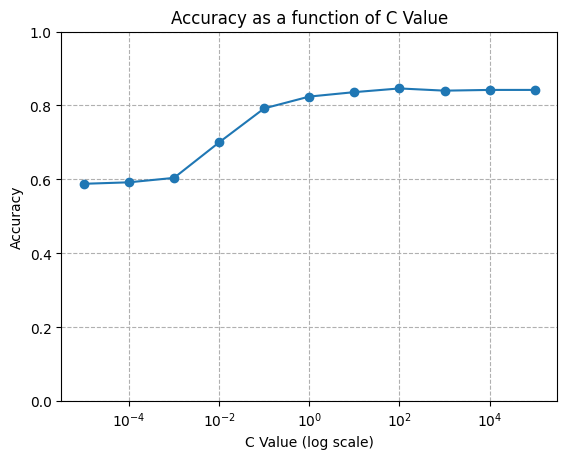

In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Train Linear kernel SVM for different values of C on train data
exponents = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
Cs = [ 10**exp for exp in exponents  ] # TODO: fill in the hyper-parameter candidates

accuracies = []

for c in Cs:
  # Instatiate model
  lsvc = LinearSVC(random_state = 7, C = c, dual=False)
  # Fit the model and get prediction and evalutation on testing data.
  lsvc.fit(X_train_norm, y_train)
  y_pred = lsvc.predict(X_test_norm)

  # Save results in accuracies array
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)

#Plot accuracy on test data
plt.plot(Cs, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('C Value (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of C Value')
plt.grid(True, which="both", ls="--")
plt.ylim(0, 1)
plt.show()

### 2.b

The RBF kernel is expressed as $exp(γ\|x-x' \|)$.

$\gamma$ defines how much influence a single training example has. The larger $\gamma$ is, the closer other examples must be to be affected.

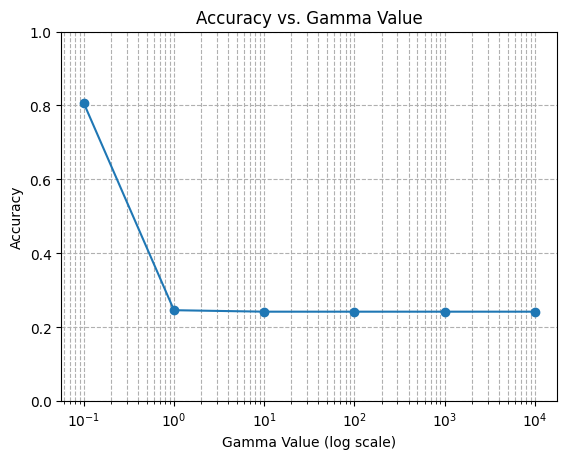

In [10]:
from sklearn.svm import SVC

#Train RBF kernel SVM for different values of gamma on train data
#Fill in the hyper-parameter candidates
exponents = [-1, 0, 1, 2, 3, 4]
gammas = [ 10**exp for exp in exponents  ]

accuracies = []
for g in gammas:
  # Instatiate model
  rsvc = SVC(random_state = 7, C=1.0, kernel='rbf', gamma = g)
  # Fit the model and get prediction and evalutation on testing data.
  rsvc.fit(X_train_norm, y_train)

  y_pred = rsvc.predict(X_test_norm)
  # Save results in accuracies array
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)

# Plot accuracy on test data
plt.plot(gammas, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Gamma Value (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Gamma Value')
plt.grid(True, which="both", ls="--")
plt.ylim(0, 1)
plt.show()

### 2.c

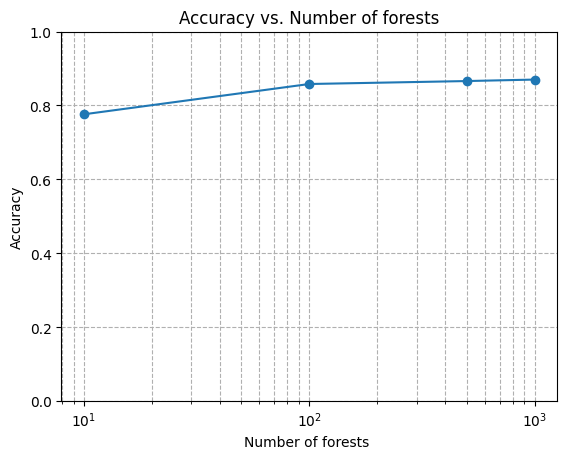

In [11]:
from sklearn.ensemble import RandomForestClassifier
accuracies = []
# Fill in the hyper-parameter candidates
n_trees = [10,100,500,1000]
# Train Random Forest for different values of number of estimators on train data
for n in n_trees:
  # Instatiate model
  rf = RandomForestClassifier(random_state = 7, n_estimators=n)
  # Fit the model and get prediction and evalutation on testing data.
  rf.fit(X_train_norm,y_train)
  y_pred = rf.predict(X_test_norm)

  # Save results in accuracies array
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
# Plot accuracy on test data
plt.plot(n_trees, accuracies, marker = 'o')
plt.xscale('log')
plt.xlabel('Number of forests ')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of forests')
plt.grid(True, which = "both", ls = "--")
plt.ylim(0,1)
plt.show()

### 2.d

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

n_folds = 5

# Configure the cross-validation procedure
cv = KFold(n_splits=n_folds, shuffle=True, random_state=1)

# Define search space for parts a, b, and C

# For LSVC
space_a = {
    'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], # Regularization parameter
}

# For RSVC
space_b = {
    'gamma': [0.1, 1, 10, 100, 1000, 10000] # Kernel coefficient
}

# For RF
space_c = {
    'n_estimators': [10, 100, 500, 1000], # Number of trees
}

# Define the model for parts a, b, and C
lsvc = LinearSVC(random_state = 7, dual=False)
rsvc = SVC(random_state = 7, C=1.0, kernel='rbf')
rf = RandomForestClassifier(random_state = 7)

# Perform a grid search and cross-validation to find the optimal hyperparameters of parts a, b, and c
# define search
search_a = GridSearchCV(lsvc, space_a, scoring='accuracy', n_jobs=-1, cv=cv)
search_b = GridSearchCV(rsvc, space_b, scoring='accuracy', n_jobs=-1, cv=cv)
search_c = GridSearchCV(rf, space_c, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result_a = search_a.fit(X_train_norm, y_train)
result_b = search_b.fit(X_train_norm, y_train)
result_c = search_c.fit(X_train_norm, y_train)


# get the best performing model fit on the whole training set
best_model_a = result_a.best_estimator_
best_model_b = result_b.best_estimator_
best_model_c = result_c.best_estimator_

# evaluate model on the hold out dataset
yhat_a = best_model_a.predict(X_test_norm)
yhat_b = best_model_a.predict(X_test_norm)
yhat_c = best_model_a.predict(X_test_norm)

# For each part, report the optimal value and report the accuracy on test data for the best estimator
print(f"Optimal C for LinearSVC: {search_a.best_params_['C']}")
print(f"Optimal gamma for RSVC: {search_b.best_params_['gamma']}")
print(f"Optimal parameters for RandomForest: n_estimators={search_c.best_params_['n_estimators']}")

print(f"Accuracy of best LinearSVC on test data: {search_a.best_estimator_.score(X_test_norm, y_test)}")
print(f"Accuracy of best RSVC on test data: {search_b.best_estimator_.score(X_test_norm, y_test)}")
print(f"Accuracy of best RandomForest on test data: {search_c.best_estimator_.score(X_test_norm, y_test)}")


Optimal C for LinearSVC: 100
Optimal gamma for RSVC: 0.1
Optimal parameters for RandomForest: n_estimators=500
Accuracy of best LinearSVC on test data: 0.846
Accuracy of best RSVC on test data: 0.806
Accuracy of best RandomForest on test data: 0.866
